## Gastos Deputados Federais no ano de 2019

#### Treinando e aprendendo analisar dados em Python

#### Arrumando e agregando os dados

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
dados = pd.read_csv("C:/Users/mcaio/Desktop/Nova pasta/Ano-2019.csv", delimiter= ";")

In [ ]:
dados.tail(20)

In [ ]:
dados.shape

In [3]:
dados = dados.rename(columns = {'X.U.FEFF.txNomeParlamentar': 'NomeParlamentar', 'txtFornecedor': 'fornecedor', 'txtDescricao':'Descricao', 'vlrLiquido':'ValorLiquido','vlrGlosa':'ValorGlosa','vlrDocumento':'ValorDocumento', 'datEmissao':'DataEmissao'})

In [ ]:
#teste = dados.loc[dados["ValorLiquido"] < 118.00, "txNomeParlamentar"]

In [4]:
dados = dados[dados['cpf'].notna()]

### Gastos por Partido

In [43]:
gastos_partido = dados[dados["numMes"] > 1]

gastos_partido = gastos_partido.groupby(['sgPartido'])['ValorLiquido'].sum().reset_index()


In [44]:
gastos_partido["ValorLiquido"] = gastos_partido["ValorLiquido"].div(1e6).round(3) 

In [45]:
gastos_partido.sort_values(by = "ValorLiquido", ascending = False)

,sgPartido,ValorLiquido
18,PT,22.500
16,PSL,16.979
10,PP,15.813
8,PL,15.228
14,PSD,13.552
3,MDB,13.449
22,REPUBLICANOS,12.661
15,PSDB,11.844
7,PDT,11.273
2,DEM,10.428


In [46]:
gastos_partido["percentual"] = (gastos_partido["ValorLiquido"] / gastos_partido["ValorLiquido"].sum()*100).round(2)

In [47]:
gastos_partido = gastos_partido.sort_values(by = "percentual", ascending = False)

In [48]:
gastos_partido

,sgPartido,ValorLiquido,percentual
18,PT,22.500,11.69
16,PSL,16.979,8.82
10,PP,15.813,8.22
8,PL,15.228,7.91
14,PSD,13.552,7.04
3,MDB,13.449,6.99
22,REPUBLICANOS,12.661,6.58
15,PSDB,11.844,6.15
7,PDT,11.273,5.86
2,DEM,10.428,5.42


### Gastos por Atividades

In [49]:
gasto_atividades = dados[dados["numMes"] > 1] 

gasto_atividades = gasto_atividades[gasto_atividades["Descricao"] != "PASSAGEM AÉREA - SIGEPA"]

gasto_atividades = gasto_atividades[gasto_atividades["cpf"].notna()]

In [50]:
gasto_atividades = gasto_atividades.groupby(['Descricao'])['ValorLiquido'].sum().reset_index()

In [52]:
gasto_atividades["ValorLiquido"] = gasto_atividades["ValorLiquido"].div(1e6).round(3)

In [54]:
gasto_atividades = gasto_atividades.sort_values(by = "ValorLiquido", ascending = False)

In [59]:
gasto_atividades["percentual"] = (gasto_atividades["ValorLiquido"] / gasto_atividades["ValorLiquido"].sum()*100).round(3)

In [60]:
gasto_atividades

,Descricao,ValorLiquido,percentual
12,PASSAGEM AÉREA - RPA,51.500,26.752
3,DIVULGAÇÃO DA ATIVIDADE PARLAMENTAR.,44.223,22.972
8,LOCAÇÃO OU FRETAMENTO DE VEÍCULOS AUTOMOTORES,24.729,12.846
9,MANUTENÇÃO DE ESCRITÓRIO DE APOIO À ATIVIDADE ...,21.720,11.283
2,"CONSULTORIAS, PESQUISAS E TRABALHOS TÉCNICOS.",19.036,9.889
1,COMBUSTÍVEIS E LUBRIFICANTES.,15.387,7.993
17,TELEFONIA,4.426,2.299
11,PASSAGEM AÉREA - REEMBOLSO,3.461,1.798
16,SERVIÇOS POSTAIS,1.708,0.887
5,"HOSPEDAGEM ,EXCETO DO PARLAMENTAR NO DISTRITO ...",1.685,0.875


### Gráfico

In [68]:
partido = gastos_partido["sgPartido"]

gastos = gastos_partido["percentual"]

[Text(0.5, 0, '(%) em milhões'),
 Text(0.5, 1.0, 'Percentual(%) de Gastos dos Partidos em 2019')]

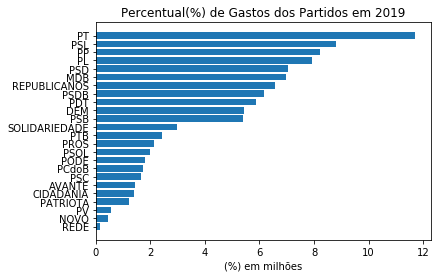

In [69]:
fig, ax = plt.subplots()
ax.barh(partido, gastos)
ax.invert_yaxis()
ax.set(title = "Percentual(%) de Gastos dos Partidos em 2019", xlabel = "(%) em milhões")


In [62]:
atividades = gasto_atividades["Descricao"]

montante = gasto_atividades["ValorLiquido"]

[Text(0.5, 0, 'milhões de reais'),
 Text(0.5, 1.0, 'Gastos (em milhões) por atividades em 2019')]

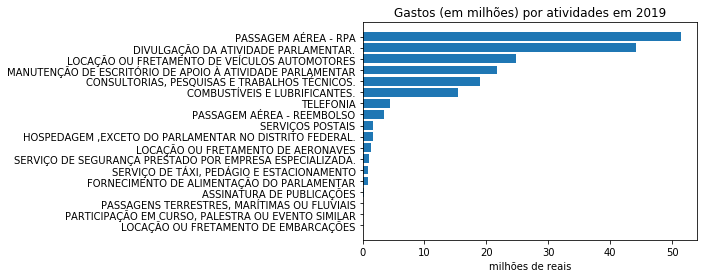

In [67]:

fig1, graf_atividades = plt.subplots()
graf_atividades.barh(atividades, montante)
graf_atividades.invert_yaxis()
graf_atividades.set(title = "Gastos (em milhões) por atividades em 2019", xlabel = "milhões de reais")